In [16]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import PIL
tf.__version__


#dataset - https://www.kaggle.com/kutaykutlu/forest-fire

'2.4.1'

In [2]:
tf.test.is_gpu_available

<function tensorflow.python.framework.test_util.is_gpu_available(cuda_only=False, min_cuda_compute_capability=None)>

In [3]:
training_datagen = ImageDataGenerator(rescale=1./255,
                                      horizontal_flip=True,
                                      vertical_flip=True,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      height_shift_range=0.2,
                                      width_shift_range=0.2,
                                      validation_split=0.1)

In [4]:
train = training_datagen.flow_from_directory("./FireSmoke/Train", 
                                            target_size = (256, 256),
                                            color_mode='rgb',
                                            class_mode='binary',
                                            batch_size=16,
                                            subset='training')
#256x256 is default

val = training_datagen.flow_from_directory("./FireSmoke/Train", 
                                            target_size = (256, 256),
                                            color_mode='rgb',
                                            class_mode='binary',
                                            batch_size=16,
                                            subset='validation')

Found 12360 images belonging to 2 classes.
Found 1373 images belonging to 2 classes.


In [5]:
cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='same',
                               input_shape=[256, 256, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))


cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu',padding='same'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu',padding='same'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

cnn.add(tf.keras.layers.Flatten())


cnn.add(tf.keras.layers.Dense(128, activation='relu'))
cnn.add(tf.keras.layers.Dense(64, activation='relu'))
cnn.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [6]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 32768)             0

In [7]:
cnn.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

checkpoint = tf.keras.callbacks.ModelCheckpoint("./model.h5", monitor='val_loss', save_best_only=True, mode='min')
cnn.fit(train, 
        validation_data=val,
        epochs=1, 
        steps_per_epoch=train.samples//16, #batch_size
        validation_steps=val.samples//16,
        callbacks=checkpoint)

772/772 [==============================] - 1187s 2s/step - loss: 0.1131 - accuracy: 0.9646 - val_loss: 0.0094 - val_accuracy: 0.9941


In [14]:
from tensorflow.keras.preprocessing import image

test_img_link = "./FireSmoke/test_small/fire1.png"
test_image = image.load_img(test_img_link, target_size=(256, 256))
test_image = image.img_to_array(test_image)
test_image = test_image/255
test_image = np.expand_dims(test_image, axis=0)                        #sort of like batch size for test image

[[0.74588686]]

[[1]]


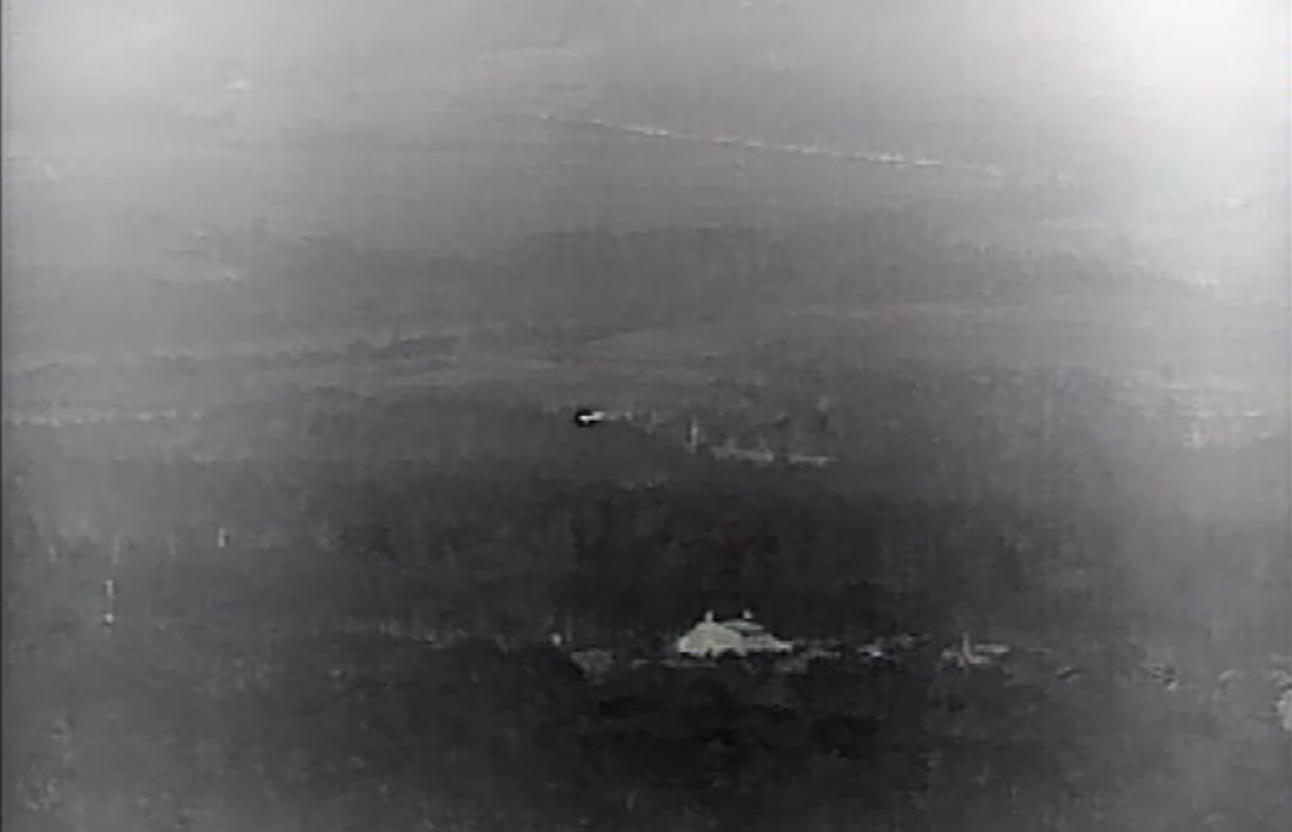

In [17]:
result = cnn.predict(test_image)
result1 = cnn.predict_classes(test_image)

print(result)
print()
print(result1)
PIL.Image.open(test_img_link)